In [1]:
import glob
import os

# import matplotlib as mpl
import matplotlib.pyplot as plt
import palettable.colorbrewer.diverging as pld

import numpy as np
import pandas as pd

# from sklearn import preprocessing
# from scipy import integrate  
# import scipy.signal as scipy
# from scipy.optimize import curve_fit

%matplotlib widget


/nsls2/conda/envs/2023-3.1-py310-tiled/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Plotting parameters

In [2]:
# palette = pld.RdYlGn_4_r
palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
transparency = 0.7
labelsize = 12
spinewidth = 1.5
fontsize = 12
legendsize = 12
fontweight = 'regular'
labelpad = 6
pad = 10
linewidth = 2.2
markersize = 6

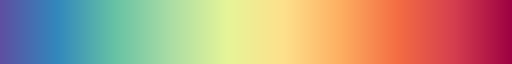

In [3]:
cmap

In [4]:
plt.close('all')

## In the current working folder (cwd)
## Find the datafiles of .cal for best fitting

In [5]:
# cwd = os.getcwd()
cwd = '/home/xf28id2/Documents/ChengHung/20230508_DSE_upload/I_00uL/DFA_24_02'
cal_files = glob.glob(cwd + '/**.cal')
cal_files.sort()
print(*cal_files, sep = '\n')  ## Print one element per line


## Find the datafiles of 2D size distribution
mtx_files = glob.glob(cwd + '/**.mtx')
mtx_files.sort()
print(*mtx_files, sep = '\n')  ## Print one element per line


/home/xf28id2/Documents/ChengHung/20230508_DSE_upload/I_00uL/DFA_24_02/CsPbBr2-I_00_SPD#01.cal
/home/xf28id2/Documents/ChengHung/20230508_DSE_upload/I_00uL/DFA_24_02/I_00uL_mean_Best.cal
/home/xf28id2/Documents/ChengHung/20230508_DSE_upload/I_00uL/DFA_24_02/stage_best.cal
/home/xf28id2/Documents/ChengHung/20230508_DSE_upload/I_00uL/DFA_24_02/DB_CsPbBr3_30nm_TOPAS_2401_plot2D.mtx


## Read **.cal into pandas dataframe
### **_Best.cal: current best refinement
### **_SPD#01.cal: one-time simulation

In [6]:
k = 0
os.path.basename(cal_files[k])

'CsPbBr2-I_00_SPD#01.cal'

In [7]:
cal_fn = cal_files[k]

if '_SPD#01' in cal_fn:
    skiprows=0

elif '_Best' in cal_fn:
    skiprows=2

df0 = pd.read_csv(cal_fn, header=None, skiprows=skiprows, delim_whitespace=True)
df = df0.dropna(axis=1).rename(columns={0:'theta', 1:'obs', 2:'cal', 3:'cal1', 4:'cal2', 5:'bkg'})

## Read **_plot2D.mtx into pandas dataframe
df1 = pd.read_csv(mtx_files[0], skiprows=1, sep=' ', skipinitialspace=True)
updated_labels = df1.columns.values.tolist()
del updated_labels[0]
updated_labels.append('None')
df1.columns = updated_labels

In [8]:
# df.head()

In [9]:
# df1.head()

## Plot **_Best.cal

'\n## Plot **.mtx as an inset 2D plot in ax1\nfrom mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition\n## Method 1:\nax2 = plt.axes(projection=\'3d\')\n#ax2 = plt.axes([0,0,1,1])\nip = InsetPosition(ax1, [0.45, 0.45, 0.45, 0.45])\nax2.set_axes_locator(ip)\n## Method 2:\nax2 = inset_axes(ax1, width="120%", height="120%",\n                   bbox_to_anchor=(0.45, 0.45, 0.45, 0.45),\n                   bbox_transform=ax1.transAxes, loc=10)\n'

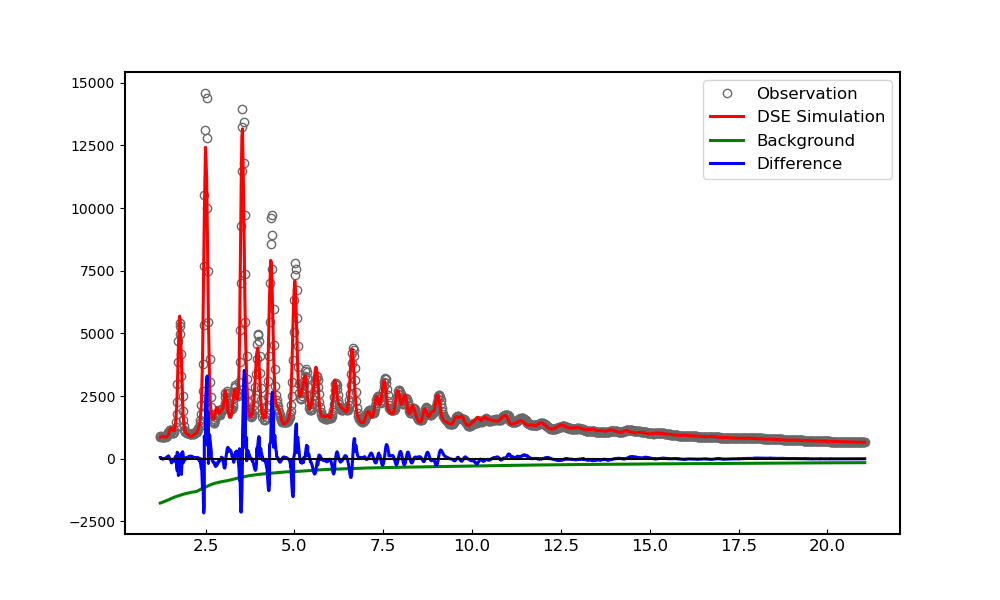

In [10]:
f1, ax1 = plt.subplots(1, 1, figsize = (10, 6))
data_range = 1200 #648 # < 12 degree
ax1.plot(df.theta[:data_range], df.obs[:data_range], label='Observation', marker='o',color='dimgrey', fillstyle='none', linestyle='None', markersize=markersize)
ax1.plot(df.theta[:data_range], df.cal[:data_range], 'r-', label='DSE Simulation', linewidth=linewidth)
ax1.plot(df.theta[:data_range], df.bkg[:data_range], 'g-', label='Background', linewidth=linewidth)

y_offset = 0
difference = df.obs - df.cal + y_offset
ax1.plot(df.theta[:data_range], difference[:data_range], 'b-', label='Difference', linewidth=linewidth)
ax1.hlines(y=0+y_offset, xmin=df.theta[0], xmax=df.theta[data_range], color='k', linestyle='-')

legend_properties = {'size':legendsize, 'weight':fontweight}
ax1.legend(prop=legend_properties) #, bbox_to_anchor=(0.31, 0.30))

# ax1.set_xticks([])
ax1.tick_params(axis='x', direction='in', labelsize=labelsize)
#plt.setp(ax1.get_xticklabels(), fontweight="bold")
ax1.spines["bottom"].set_linewidth(spinewidth)
# ax1.set_yticks([])
ax1.spines["left"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
#ax1.spines['left'].set_visible(False)

# imag_name = 'Best_cal_06-6.png'
# plt.savefig(imag_name, dpi = 600,  transparent=True)

'''
## Plot **.mtx as an inset 2D plot in ax1
from mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition
## Method 1:
ax2 = plt.axes(projection='3d')
#ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.45, 0.45, 0.45, 0.45])
ax2.set_axes_locator(ip)
## Method 2:
ax2 = inset_axes(ax1, width="120%", height="120%",
                   bbox_to_anchor=(0.45, 0.45, 0.45, 0.45),
                   bbox_transform=ax1.transAxes, loc=10)
'''

## Plot **.mtx as an 2D plot in ax2

In [11]:
df1.columns.values

array(['n_ab', 'n_c', 'Number_Frac.', 'Mass_Frac.', 'Diam[nm]',
       'Volume[nm^3]', 'Mass[amu]', 'Base_Diam.(e.c.)[nm]', 'Height[nm]',
       'Lattice_Expan.[]', 'OCC_ATOM_01', 'Biso_ATOM_01[A^2]',
       'OCC_ATOM_02', 'Biso_ATOM_02[A^2]', 'OCC_ATOM_03',
       'Biso_ATOM_03[A^2]', 'OCC_ATOM_04', 'Biso_ATOM_04[A^2]', 'None'],
      dtype=object)

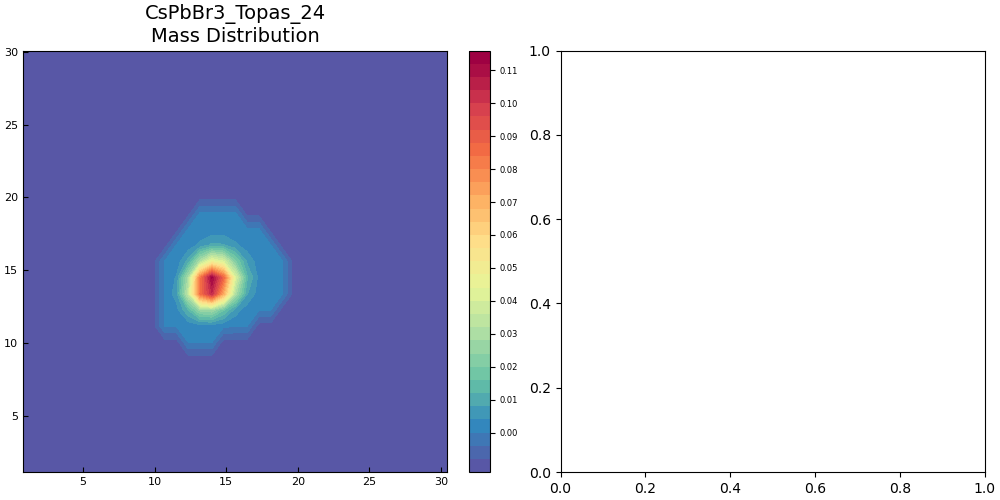

In [16]:
f2, ax2 = plt.subplots(1, 2, figsize = (10, 5), gridspec_kw={'width_ratios': [1,1]}, constrained_layout=True)
# ax2.flatten()
# titles = ['CsPbBr3_mp-56762901', 'CsPbI3_mp-112076802']
# tick_step = [0.01, 0.08]

titles = ['CsPbBr3_Topas_24']
tick_step = [0.01]

for i in range(len(titles)):
# for i in range(1):
    df_reshape = df1.pivot(index='Base_Diam.(e.c.)[nm]', columns='Height[nm]', values='Mass_Frac.')
    
    X = np.array(df_reshape.index)
    Y = np.array(df_reshape.columns)
    X, Y = np.meshgrid(Y, X)
    Z = np.array(df_reshape)
    Z[Z==0.0] = -0.01
    # cs = ax2[i].contourf(X, Y, Z, cmap=cmap)
    # cs = ax2[i].contourf(X, Y, Z, levels=36, cmap=cmap)
    cs = ax2[i].contourf(X, Y, Z, vmax = 0.113, levels=36, cmap=cmap)
    
    ax2[i].set_title(titles[i]+'\n'+'Mass Distribution', {'fontsize': 14, 'fontweight': 'normal'})
    #ax2[i].set_xticks([])
    ax2[i].tick_params(axis='both', direction='in', labelsize=labelsize-4)
    # ax2[i].set_yticks([])
    # ax2[i].tick_params(axis='y', direction='in', labelsize=labelsize-4)
    # ax2[i].set_zticks(np.arange(0.01, np.nanmax(Z), 0.02))
    # ax2[i].tick_params(axis='z', direction='in', labelsize=labelsize-4)


    # cbar = f2.colorbar(cs, shrink=1, aspect=20, ax=ax2[i])
    # cbar.set_ticks(np.arange(0, np.nanmax(Z), tick_step[i]))
    # cbar.ax.tick_params(labelsize=labelsize-6)


cbar = f2.colorbar(cs, shrink=1, aspect=20)
cbar.set_ticks(np.arange(0, np.nanmax(Z), tick_step[i]))
cbar.ax.tick_params(labelsize=labelsize-6)    

# ax2[0].set_xlim(1, 25)   ## L_c
# ax2[0].set_ylim(1.2, 25)   ## D_ab
    
# ax2[1].set_xlim(1, 5)   ## L_c
# ax2[1].set_ylim(1.2, 5)   ## D_ab

imag_name = 'ZnI2_64uL_min_DFA_01 size_bar.png'
# plt.savefig(cwd+imag_name, dpi = 600,  transparent=True)

In [13]:
np.nanmax(Z)

0.11267391

In [14]:
# df_reshape

## Export DSE calculated data and bkg

In [15]:
# fn_cal = cwd + '/CsPbBr3_20211114-120845_DSE_0608_06-6.xy'
# fn_bkg = cwd + '/Tol_Ol_Solvent_20211113-184203_DSE_0608_06-6.xy'

# df_cal = pd.DataFrame()
# df_cal['tth'] = df['theta']
# df_cal['Int_cal'] = df['cal']

# df_bkg = pd.DataFrame()
# df_bkg['tth'] = df['theta']
# df_bkg['Int_bkg'] = df['bkg']

# df_cal.to_csv(fn_cal, sep=' ', header=False, index=False, float_format='{:.8e}'.format)
# df_bkg.to_csv(fn_bkg, sep=' ', header=False, index=False, float_format='{:.8e}'.format)